In [37]:
import numpy as np
from scipy.io import loadmat,savemat
# from utils import padWithZeros,createImageCubes, generate_binary_mask
import pandas as pd
from tqdm import tqdm
from glob import glob
import matplotlib.pyplot as plt

# Patch Saving 
df = pd.read_csv("D:\\HSI Project\\Updated_Work\\HSI_Classification\\Minerals_Dataset\\Minerals_Mapped.csv")
minerals = df['Mineral'].unique().tolist()
minerals_classes = {}
for i,min in enumerate(minerals):
    minerals_classes[min] = i+1
    
print(minerals_classes)
# print(df['ID'].nunique())
# print(df.info())

print(df.head())

{'Actinolite': 1, 'Albite': 2, 'Almandine': 3, 'Andalusite': 4, 'Anhydrite': 5, 'Apatite': 6, 'Aragonite': 7, 'Arsenopyrite': 8, 'Augite': 9, 'Barite': 10, 'Beryl': 11, 'Biotite': 12, 'Blende': 13, 'Bronzite': 14, 'Bytownite': 15, 'Calcite': 16, 'Cassiterite': 17, 'Celestite': 18, 'Chalcedony': 19, 'Chalcopyrite': 20, 'Chlorite': 21, 'Clinochlore': 22, 'Coal': 23, 'Copper': 24, 'Diopside': 25, 'Dolomite': 26, 'Enstatite': 27, 'Epidote': 28, 'Fluorite': 29, 'Galena': 30, 'Garnet': 31, 'Glaucophane': 32, 'Goethite': 33, 'Graphite': 34, 'Grossular': 35, 'Gypsum': 36, 'Halite': 37, 'Halloysite': 38, 'Hematite': 39, 'Hornblende': 40, 'Hypersthene': 41, 'Ilmenite': 42, 'Kaolinite': 43, 'Kyanite': 44, 'Labradorite': 45, 'Limonite': 46, 'Magnetite': 47, 'Microcline': 48, 'Montmorillonite': 49, 'Muscovite': 50, 'Nepheline': 51, 'Olivine': 52, 'Omphacite': 53, 'Opal': 54, 'Orthoclase': 55, 'Phlogopite': 56, 'Pyrite': 57, 'Pyrolusite': 58, 'Pyrrhotite': 59, 'Quartz': 60, 'Rutile': 61, 'Sanidine':

In [43]:
def padWithZeros(X, margin=2):
    newX = np.zeros((X.shape[0] + 2 * margin, X.shape[1] + 2* margin, X.shape[2]))
    x_offset = margin
    y_offset = margin
    newX[x_offset:X.shape[0] + x_offset, y_offset:X.shape[1] + y_offset, :] = X
    return newX

def createImageCubes(X, y, windowSize=5, removeZeroLabels = True):
    margin = int((windowSize - 1) / 2)
    zeroPaddedX = padWithZeros(X, margin=margin)
    # split patches
    patchesData = np.zeros((X.shape[0] * X.shape[1], windowSize, windowSize, X.shape[2]))
    patchesLabels = np.zeros((X.shape[0] * X.shape[1]))
    patchIndex = 0
    for r in range(margin, zeroPaddedX.shape[0] - margin):
        for c in range(margin, zeroPaddedX.shape[1] - margin):
            patch = zeroPaddedX[r - margin:r + margin + 1, c - margin:c + margin + 1,:]   
            patchesData[patchIndex, :, :, :] = patch
            patchesLabels[patchIndex] = y[r-margin, c-margin]
            patchIndex = patchIndex + 1
    if removeZeroLabels:
        patchesData = patchesData[patchesLabels>0,:,:,:]
        patchesLabels = patchesLabels[patchesLabels>0]
        patchesLabels -= 1
    return patchesData, patchesLabels

  0%|          | 0/153 [00:00<?, ?it/s]

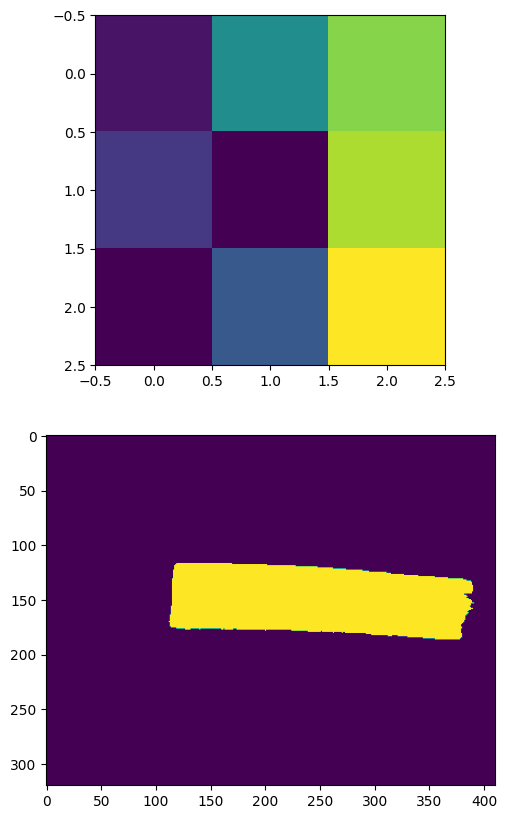

[[0.36594155 0.37334335 0.37889695]
 [0.36784413 0.3650782  0.3798727 ]
 [0.36507908 0.36977896 0.38192943]]
MINERAL ID  1
[0. 1.]


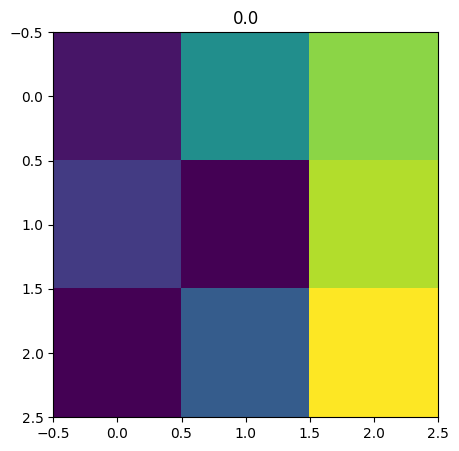

  0%|          | 0/153 [00:00<?, ?it/s]

[[0.         0.         0.        ]
 [0.         0.36594155 0.37334335]
 [0.         0.36784413 0.36507821]]


In [60]:
for _, row in tqdm(df.iterrows(),total=len(df)):
    hsi_path = row['HSI_Path']
    mask_path = row['MASK_Path']
    exp = row['Experiment']
    ID = row['ID']
    mineral = row['Mineral']
    hsi = np.transpose(loadmat(hsi_path)['HDR'][:],axes=(1,2,0))
    mask = loadmat(mask_path)['MASK'][:]
    fig,ax = plt.subplots(2,1,figsize=(10,10))
    ax[0].imshow(hsi[0:3,0:3,0],cmap='viridis')
    ax[1].imshow(mask,cmap='viridis')
    plt.show()
    print(hsi[0:3,0:3,0])
    # print(np.unique(mask))
    mask = np.where(mask==255,minerals_classes[mineral],0) 
    # plt.imshow(mask,cmap='viridis')
    # plt.show()
    print("MINERAL ID ",minerals_classes[mineral])
    patches,patchesLabels = createImageCubes(hsi,mask,3,False) ## patchLabels will have '0' label for a mineral not background, for background handle later when takn background into account
    print(np.unique(patchesLabels))
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    # for id in range(50):
    ax.imshow(patches[411,:,:,0].astype(np.float16),cmap='viridis')
    ax.set_title(patchesLabels[id])
    plt.show()
    print(patches[0,:,:,0])
    # for id in range(patches.shape[0]):
    #     save_patch_path = f'D:\\HSI Project\\Updated_Work\\HSI_Classification\\RPNet_RF\\Minerals\\Patches_3\\Patches\\{ID}_{exp}_{id}.npy'
    #     save_label_path = f'D:\\HSI Project\\Updated_Work\\HSI_Classification\\RPNet_RF\\Minerals\\Patches_3\\Labels\\{ID}_{exp}_{id}.npy'
    #     np.save(arr=patches[id].astype(np.float16),file=save_patch_path)
    #     np.save(arr=patchesLabels[id].astype(np.uint8),file=save_label_path)
    break

In [62]:
import shutil
# # shutil.rmtree("D:\\HSI Project\\Updated_Work\\HSI_Classification\\RPNet_RF\\Minerals\\Patches_3")
shutil.rmtree(r"D:\HSI Project\Updated_Work\HSI_Classification\Minerals_Dataset\Patches_Data\Patches")
shutil.rmtree(r"D:\HSI Project\Updated_Work\HSI_Classification\Minerals_Dataset\Patches_Data\Labels")

[[0.2980456  0.30467036 0.30223855]
 [0.30564925 0.3062396  0.30755723]
 [0.30420956 0.30674532 0.3135686 ]]


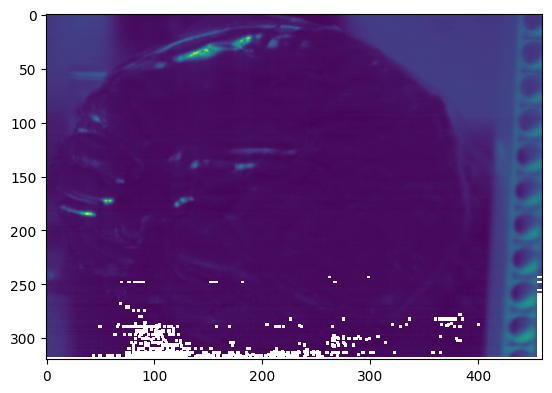

In [56]:
# hsi_path_bg = df[df['Mineral']=="Background"].loc[152]['HSI_Path']
# mask_path_bg = df[df['Mineral']=="Background"].loc[152]['MASK_Path']
# id_bg = df[df['Mineral']=="Background"].loc[152]['ID']
# exp_bg = df[df['Mineral']=="Background"].loc[152]['Experiment']
# mineral = 'Background'
# hsi = np.transpose(loadmat(hsi_path_bg)['HDR'][:],axes=(1,2,0))
# print(hsi[0:3,0:3,0])
# mask = loadmat(mask_path_bg)['MASK'][:]
# plt.imshow(hsi[:,:,0],cmap='viridis')
# plt.show()
# mask = np.where(mask==255,minerals_classes[mineral],0) 
# patches,patchesLabels = createImageCubes(hsi,mask,3,True) ## patchLabels will have '0' label for a mineral not background, for background handle later when takn background into account

# for id in range(patches.shape[0]):
#     save_patch_path = f'D:\\HSI Project\\Updated_Work\\HSI_Classification\\RPNet_RF\\Minerals\\Patches_3\\Patches\\{id_bg}_{exp_bg}_{id}.npy'
#     save_label_path = f'D:\\HSI Project\\Updated_Work\\HSI_Classification\\RPNet_RF\\Minerals\\Patches_3\\Labels\\{id_bg}_{exp_bg}_{id}.npy'
#     np.save(arr=patches[id].astype(np.float16),file=save_patch_path)
#     np.save(arr=patchesLabels[id].astype(np.uint8),file=save_label_path)

In [6]:
import torch
import numpy as np
x = torch.tensor(np.array([0.2,0.4,0.1,0.3]))
torch.nn.functional.softmax(x)

C:\Users\Use Me\AppData\Local\Temp\ipykernel_31288\2487523520.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  torch.nn.functional.softmax(x)


tensor([0.2363, 0.2887, 0.2138, 0.2612], dtype=torch.float64)